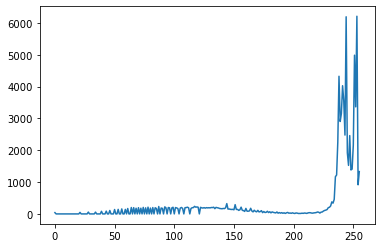

In [3]:
import cv2
import matplotlib.pyplot as plt

path = r'../images/trex.png'
# Load image in grey scale
image = cv2.imread(path, 0)

# Open image
cv2.startWindowThread()
cv2.imshow("Original", image)

# Calculate histogram using cv2.calcHist()
hist = cv2.calcHist([image], [0], None, [256], [0,256])
# Display the histogram
plt.plot(hist)

cv2.waitKey(0)
cv2.destroyAllWindows()

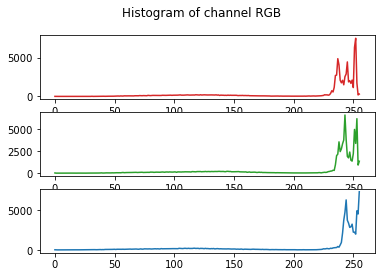

In [2]:
import cv2
import matplotlib.pyplot as plt

path = r'../images/trex.png'
# Load image in RGB scale
image = cv2.imread(path)

# Convert into gray image
#gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Open image
cv2.startWindowThread()
cv2.imshow("Original", image)
cv2.waitKey(0)

(B, G, R) = cv2.split(image)
cv2.imshow('RED', R)
cv2.imshow('GREEN', G)
cv2.imshow('BLUE', B)


# Calculate histogram using cv2.calcHist()
#histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
hist_red = cv2.calcHist([image], [2], None, [256], [0,256])
hist_green = cv2.calcHist([image], [1], None, [256], [0,256])
hist_blue = cv2.calcHist([image], [0], None, [256], [0,256])
# Display the histogram
'''
plt.plot(histogram, color='k')
plt.show()

for i, col in enumerate(['b', 'g', 'r']):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist, color = col)
    plt.xlim([0, 256])
plt.show()
'''
fig, axs = plt.subplots(nrows=3, ncols=1)
fig.suptitle('Histogram of channel RGB')
axs[0].plot(hist_red, 'tab:red')
axs[1].plot(hist_green, 'tab:green')
axs[2].plot(hist_blue, 'tab:blue')
#fig.tight_layout(pad=3.0)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Image Histogram
An image histogram tells us how the intensity values are distributed in an image. In this we plot the intensity values on the x-axis and the no. of pixels corresponding to intensity values on the y-axis. See the figure below.

![hist1](notebook_figures/image-to-histogram.png)

This is called 1D histogram because we are taking only one feature into our consideration, i.e. greyscale intensity value of the pixel. In the next blog, we will discuss 2D histograms.

Now, let’s understand some terminologies associated with histogram

![hist2](notebook_figures/hist.png)

Tonal range refers to the region where most of the intensity values are present (See above figure). The left side represents the black and dark areas known as shadows, the middle represents medium grey or midtones and the right side represents light and pure white areas known as Highlights.

So, for a dark image the histogram will cover mostly the left side and center of the graph. While for a bright image, the histogram mostly rests on the right side and center of the graph as shown in the figure below

![hist3](notebook_figures/dark-and-bright-image-histogram.png)

Now, let’s see how to plot the histogram for an image using OpenCV and matplotlib.

**OpenCV** To calculate the image histogram, OpenCV provides the following function
> `cv2.calcHist(image, channel, mask, bins, range)`

* image : input image, should be passed in a list. e.g. \[image]
* channel : index of the channel. for greyscale pass as \[0], and for color image pass the desired channel as \[0], \[1], \[2].
* mask : provide if you want to calculate histogram for specific region otherwise pass None.
* bins : No. of bins to use for each channel, should be passed as \[256]
* range : range of intensity values. For 8-bit pass as \[0,256] 

This returns a numpy.ndarray with shape (n_bins,1) which can then be plotted using matplotlib. Below is the code for this

```
import cv2
import matplotlib.pyplot as plt
 
# Load the image
image = cv2.imread('hist.jpg',0)
 
# Calculate histogram using cv2.calcHist()
hist = cv2.calcHist([image], [0], None, [256], [0,256])
# Display the histogram
plt.plot(hist)
```
**Matplotlib:** Unlike OpenCV, matplotlib directly finds the histogram and plots it using plt.hist()

For a color image, we can show each channel individually or we can first convert it into greyscale and then calculate the histogram. So, a color histogram can be expressed as “Three Intensity(Greyscale) Histograms”, each of which shows the brightness distribution of each individual Red/Green/Blue color channel. Below figure summarizes this.

### Original Color Image
![hist3](notebook_figures/pasta.png)


![hist4](notebook_figures/red_geen_blue-histogram.png)
